In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_images,train_label),(test_images,test_label)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential

In [13]:
train_images.shape

(60000, 28, 28)

In [15]:
train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)
train_images = train_images / 255.0

test_images = test_images / 255.0

9

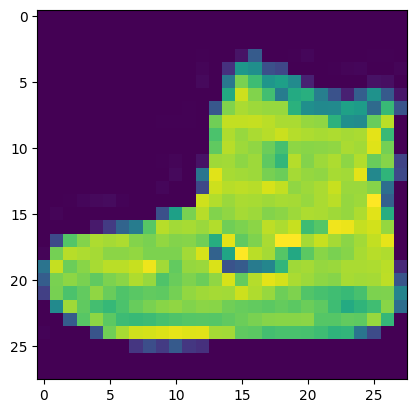

In [16]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
train_label[0]

In [17]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               524416    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 526346 (2.01 MB)
Trainable params: 526346 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [24]:
model.fit(train_images,train_label,epochs=5,batch_size=1000)

Epoch 1/5
60/60 [==============================] - 1s 15ms/step - loss: 0.7884 - accuracy: 0.7151
Epoch 2/5
60/60 [==============================] - 1s 14ms/step - loss: 0.7443 - accuracy: 0.7255
Epoch 3/5
60/60 [==============================] - 1s 14ms/step - loss: 0.7131 - accuracy: 0.7343
Epoch 4/5
60/60 [==============================] - 1s 15ms/step - loss: 0.6869 - accuracy: 0.7432
Epoch 5/5
60/60 [==============================] - 1s 15ms/step - loss: 0.6665 - accuracy: 0.7482


In [19]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [20]:
pred=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [21]:
pred.shape

(10000, 10)

In [27]:
from sklearn.metrics import accuracy_score
predicted_labels = np.argmax(pred, axis=1)


accuracy = accuracy_score(test_label, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.7


trouser


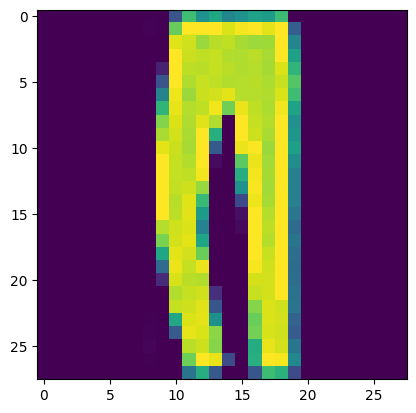

In [31]:
plt.imshow(test_images[2])
print(labels[np.argmax(pred[2])])